# Vizualizacija

In [175]:
# importamo podatke iz deljenega diska
%store -r data_dict
data_dict = data_dict # da bo linter miren
data_dict.keys()

dict_keys(['po-obcinah_izobrazba', 'po-obcinah_spol', 'po-obcinah_starost', 'po-obcinah_trajanje-brezposelnosti', 'po-statisticnah-regijah_izobrazba', 'po-statisticnah-regijah_spol', 'po-statisticnah-regijah_starost', 'po-statisticnah-regijah_trajanje-brezposelnosti', 'po-uradih-za-delo_izobrazba', 'po-uradih-za-delo_spol', 'po-uradih-za-delo_starost', 'po-uradih-za-delo_trajanje-brezposelnosti'])

### Trend brezposelnosti po regijah

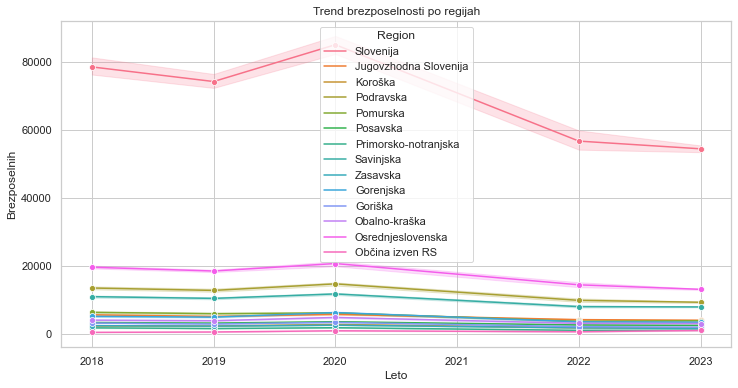

In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = data_dict['po-statisticnah-regijah_izobrazba']

data = data.dropna()

data = data.rename(columns={
    'Kohezijska / Statistična regija': 'Region',
    'Skupaj': 'Total'
})

data = data.query("Region not in ['Slovenia', 'Vzhodna Slovenija', 'Zahodna Slovenija']")

melted_data = pd.melt(data, id_vars=['Region', 'year'], value_vars=['Total'], var_name='Izobrazba', value_name='Unemployment')

sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=melted_data, x='year', y='Unemployment', hue='Region', marker='o', ax=ax)

ax.set_title('Trend brezposelnosti po regijah')
ax.set_xlabel('Leto')
ax.set_ylabel('Brezposelnih')

plt.show()


### Brezposelnost po izobrazbi
Grafikon prikazuje brezposelnost v Sloveniji glede na izobrazbeno raven in statistično regijo. Podatki so razdeljeni v pet kategorij izobrazbe: 1+2 OŠ ali manj, 3+4 nižje, srednje poklicno izobraževanje, 5 srednje tehnično, strokovno in splošno izobraževanje ter 6+7+8 visokošolsko izobraževanje prve, druge in tretje stopnje. Na grafikonu so prikazani podatki samo za Slovenijo.

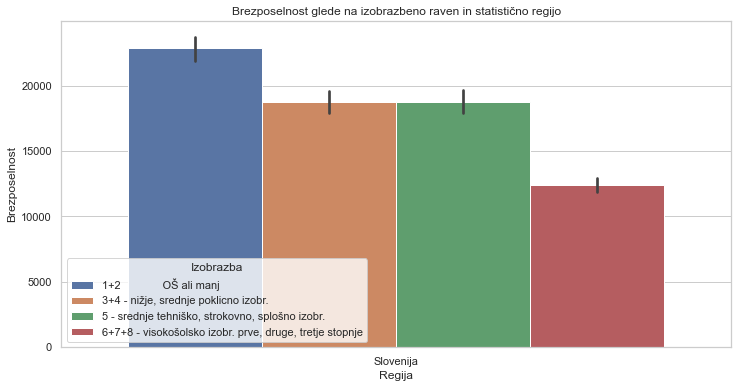

In [177]:
data = data_dict['po-statisticnah-regijah_izobrazba']

data = data.dropna()

data.columns = data.columns.str.strip()

data = data.rename(columns={
    'Kohezijska / Statistična regija': 'Region',
    'Skupaj': 'Total'
})

data = data.query("Region in ['Slovenija']")

melted_data = pd.melt(data, id_vars=['Region', 'year'], value_vars=['1+2              OŠ ali manj', '3+4 - nižje, srednje poklicno izobr.', '5 - srednje tehniško, strokovno, splošno izobr.', '6+7+8 - visokošolsko izobr. prve, druge, tretje stopnje'], var_name='Izobrazba', value_name='Unemployment')

sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=melted_data, x='Region', y='Unemployment', hue='Izobrazba', ax=ax)

ax.set_title('Brezposelnost glede na izobrazbeno raven in statistično regijo')
ax.set_xlabel('Regija')
ax.set_ylabel('Brezposelnost')

plt.show()


### Spremembe brezposelnosti glede na izobrazbeno raven čez čas v Sloveniji

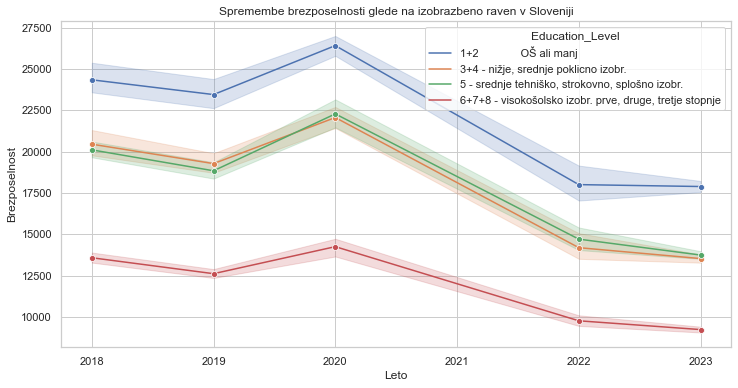

In [178]:

data = data_dict['po-statisticnah-regijah_izobrazba']

data = data.dropna()

data.columns = data.columns.str.strip()

data = data.rename(columns={
    'Kohezijska / Statistična regija': 'Region',
    'Skupaj': 'Total'
})

data = data.query("Region in ['Slovenija']")

melted_data = pd.melt(data, id_vars=['Region', 'year'], value_vars=['1+2              OŠ ali manj', '3+4 - nižje, srednje poklicno izobr.', '5 - srednje tehniško, strokovno, splošno izobr.', '6+7+8 - visokošolsko izobr. prve, druge, tretje stopnje'], var_name='Education_Level', value_name='Unemployment')

sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=melted_data, x='year', y='Unemployment', hue='Education_Level', marker='o', ax=ax)

ax.set_title('Spremembe brezposelnosti glede na izobrazbeno raven v Sloveniji')
ax.set_xlabel('Leto')
ax.set_ylabel('Brezposelnost')

plt.show()


### Povprečna dolžina brezposelnosti po regijah in letih

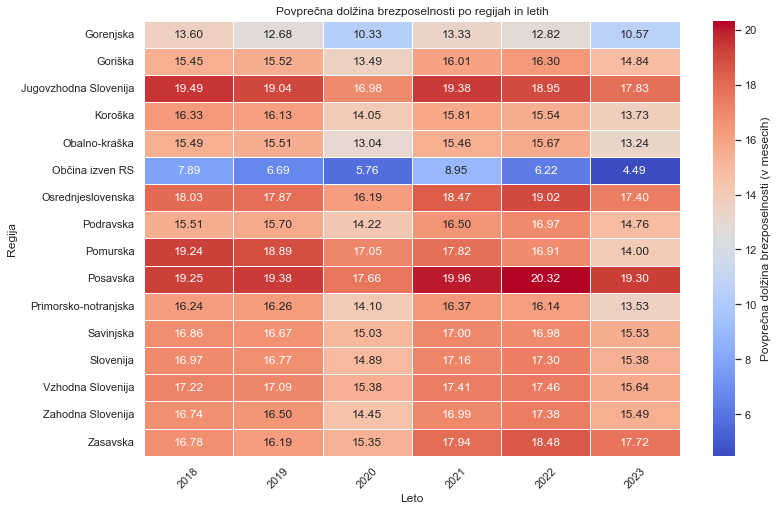

In [179]:
unemployment_duration_regions = data_dict['po-statisticnah-regijah_trajanje-brezposelnosti']

unemployment_duration_regions = unemployment_duration_regions[unemployment_duration_regions['year'] >= 2018]

unemployment_duration_regions['weighted_avg_duration'] = (
    unemployment_duration_regions['Do 2 meseca'] * 1 +
    unemployment_duration_regions['3 do 5 mesecev'] * 4 +
    unemployment_duration_regions['6 do 8 mesecev'] * 7 +
    unemployment_duration_regions['9 do 11 mesecev'] * 10 +
    unemployment_duration_regions['12 do 23\n mesecev'] * 17.5 +
    unemployment_duration_regions['24 do 35\n mesecev'] * 29.5 +
    unemployment_duration_regions['36 mesecev ali več'] * 36
) / unemployment_duration_regions['Skupaj']

pivot_table = unemployment_duration_regions.pivot_table(values='weighted_avg_duration', index='__regija', columns='year')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5, cbar_kws={'label': 'Povprečna dolžina brezposelnosti (v mesecih)'})
plt.title('Povprečna dolžina brezposelnosti po regijah in letih')
plt.xlabel('Leto')
plt.ylabel('Regija')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()